# **Part A**

### **1. Read and Analyse Dataset**

**A. Write outcome of data analysis**

In [1]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 21.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2d512cdef80ad269ea61277f453130de52e38170983e7c4b74f965262d28930e
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [2]:
# Import libraries

import numpy as np
import pandas as pd

# Unzip the zip files
from zipfile import ZipFile

# For regular expressions
import re

# To detect language other than english
from langdetect import detect

# To remove stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Test train split
from sklearn.model_selection import train_test_split

# Vectorize the data
from sklearn.feature_extraction.text import CountVectorizer

# Multilabel Binarizer
from sklearn.preprocessing import MultiLabelBinarizer

# Linear Classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Performance matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/Colab Notebooks/blogs.zip'

In [5]:
with ZipFile(file_path,'r') as zip:
  listOfFileNames = zip.namelist()
  zip.extractall(path='/content/drive/My Drive/Colab Notebooks/')

In [6]:
listOfFileNames

['blogtext.csv']

In [7]:
csv_path = '/content/drive/My Drive/Colab Notebooks/blogtext.csv'

In [8]:
blog_data = pd.read_csv(csv_path)

In [9]:
blog_data.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


**B. Clean the structured data**

In [10]:
# Get the column name
blog_data.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [11]:
# Check for null values
blog_data.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [12]:
len(blog_data)

681284

In [13]:
# Cut the data
blog_data_1 = blog_data.head(500)

In [14]:
len(blog_data_1)

500

In [15]:
blog_data_1.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [16]:
# Defining funtion for detection of english text
def detect_english(text):
  try:
    return detect(text) == 'en'
  except:
    return False

In [17]:
type(blog_data_1)

pandas.core.frame.DataFrame

In [18]:
# Function for Detection of english words has been applied
blog_data_1_text = blog_data_1[blog_data_1['text'].apply(detect_english)]

In [19]:
type(blog_data_1_text)

pandas.core.frame.DataFrame

In [20]:
blog_data_1_text.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [21]:
len(blog_data_1_text)

494

We have selected 500 rows in first cut but after removing text other than english the number of rows( data points) reduces to 494

### **2. Pre process the unstructured data**

**A. Eliminate all the special characters and numbers**

In [22]:
# Select only alphabets

blog_data_1_text.text = blog_data_1_text.text.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**B. Lowercase all textual data**

In [23]:
# Convert text to lowercase
blog_data_1_text.text = blog_data_1_text.text.apply(lambda x: x.lower())

**C. Remove all stop words**

In [24]:
# Remove stopwords

stopwords = set(stopwords.words('english'))
blog_data_1_text.text = blog_data_1_text.text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

**D. Remove all extra white spaces**

In [25]:
# Strip unwanted spaces
blog_data_1_text.text = blog_data_1_text.text.apply(lambda x: x.strip())

In [26]:
blog_data_1_text.text[12]

'last night pretty fun mostly company kept recently met couple finance types yeouido hard referred korea wall street spoke pretty good english rarity yeouido everywhere korea studied outside korea deal international business still brutal canadian accent made pretty tough figure saying sometimes one time accent got way though went restaurant guy junseok gal named hye kyung asked like deok wrote heard thought meant dog eat called bluff said sure let go kind dog oh deok deok ya dog deok said figured meant duck said oh oh ri duck gay dog speak korean know food great went obligatory ee cha thanks hye kyung correction second round koreans never go one place eat drink usually wander streets go three four five places couple weeks ago hongdae university bar district went places san nak ji living octopus restaurant old rock cool bar noraebang korean word karaoke finally clubnb noise basement wee hours morning personally prefer kangnam version clubnb since hongdae went one coolest thing bar hoppi

### **3. Build a base classification model**

**A. Create dependent and Independent variable**s

In [27]:
# Merge all the label columns together
blog_data_1_text['labels'] = blog_data_1_text.apply(lambda row: [row['gender'], str(row['age']), row['topic'], row['sign']], axis=1)

<ipython-input-27-cd1882657347>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blog_data_1_text['labels'] = blog_data_1_text.apply(lambda row: [row['gender'], str(row['age']), row['topic'], row['sign']], axis=1)


In [28]:
# Select only required columns
blog_data_1_text_selected = blog_data_1_text[['text','labels','topic']]

In [29]:
# Print final dataframe
blog_data_1_text_selected.head(5)

,text,labels,topic
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]",Student
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]",Student
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]",Student
3,testing testing,"[male, 15, Student, Leo]",Student
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]",InvestmentBanking


In [174]:
# Total unique values for "Topic" column
classes = np.unique(blog_data_1_text_selected.topic.values)
classes

array(['Banking', 'Education', 'InvestmentBanking', 'Non-Profit',
       'Student', 'indUnk'], dtype=object)

**B. Split data into train and test**

In [175]:
X_train, X_test, y_train, y_test = train_test_split(blog_data_1_text_selected.text.values, blog_data_1_text_selected.topic.values, test_size=0.30, random_state=42)

**C. Vectorize the data**

In [176]:
# Create Bag of words

# Use Count vectorizer
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))

# Transform training and testing data
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [246]:
vectorizer.get_feature_names_out()[:5]

array(['aaa', 'aaa travel', 'aaaah', 'aaaah wisdom', 'aaahhh'],
      dtype=object)

In [178]:
X_train_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [179]:
X_test_bow.shape

(149, 52221)

**D. Build a base model for Supervised Learning**

In [281]:
# Convert training and testing labels into list of list
def extractDigits(lst):
    return list(map(lambda el:[el], lst))
      

y_train_lst = extractDigits(y_train)
y_test_lst = extractDigits(y_test)

In [282]:
# Load multilabel binarizer and fit to the labels

mlb = MultiLabelBinarizer(classes=classes)
y_train_trans = mlb.fit_transform(y_train_lst)
y_test_trans = mlb.transform(y_test_lst)

In [283]:
print(list(mlb.classes_))

['Banking', 'Education', 'InvestmentBanking', 'Non-Profit', 'Student', 'indUnk']


In [284]:
# Using Logistic Regression for linear classification

log_reg = LogisticRegression(solver='lbfgs')
log_reg = OneVsRestClassifier(log_reg)

In [285]:
# Fit the classifier
log_reg.fit(X_train_bow, y_train_trans)

OneVsRestClassifier(estimator=LogisticRegression())

In [286]:
# Get predicted labesl and scores

predicted_labels = log_reg.predict(X_test_bow)
predicted_scores = log_reg.decision_function(X_test_bow)

In [287]:
len(predicted_labels)

149

In [288]:
predicted_scores

array([[ -5.17106468,  -7.40596858,  -4.69709869,  -4.45116907,
         -2.90411845,   1.16968381],
       [ -6.44129188,  -5.98752241,   2.86819617,  -6.16953697,
        -11.07471062,  -1.45914903],
       [ -5.56943611,  -6.98054733,  -5.31160226,  -4.50903057,
         -2.6913406 ,   1.72492359],
       [ -5.66720728,  -5.90302412,  -4.84499203,  -2.19925478,
         -4.45657919,  -2.35566907],
       [ -4.75862186,  -7.39832808,  -5.15803372,  -4.37083253,
         -3.77767705,   2.49428633],
       [ -4.97355215,  -6.96177425,  -5.23207208,  -3.84301343,
         -3.08475426,   0.77948064],
       [ -4.79129771,  -7.44023286,  -5.44420233,  -3.65696928,
         -1.39803691,   0.40264574],
       [ -6.79267023,  -5.16976692,   2.29852534,  -4.9778517 ,
        -11.44965616,  -3.02057679],
       [ -6.6580885 ,  -6.08165773,  -5.284634  ,  -3.6892313 ,
         -5.69674228,   1.55365153],
       [ -5.55824755,  -7.12713697,  -1.88963046,  -5.04038098,
         -5.04866603,   0.1

In [289]:
# Get inverse transform for predeicted labels

pred_inversed = mlb.inverse_transform(predicted_labels)
y_test_inversed = mlb.inverse_transform(y_test_trans)

In [291]:
# Printing few samples

for i in range(5):
    print('Title:\t{}\nTrue topic:\t{}\nPredicted topic:\t{}\n\n'.format(
        X_test[i],
        ','.join(y_test_inversed[i]),
        ','.join(pred_inversed[i])
    ))

Title:	ya like u like new look like much happy yay serious note take awhile put shpiels tagboard links bear plus side archives returned yesh revisit posts years gone see personal journey melbourne anyways u comments new look let know leave comment meantime enjoy scenery
True topic:	indUnk
Predicted topic:	indUnk


Title:	gay korea like gay u military let say near lovingly embraced west us gays marrying korea c mon korean gays course one gay one hardly korean trying piss pcers way many koreans especially men older ones think although younger generation open ideas older generation controls politics education finance even media culture large degree ceos tv stations men old guys example things changing though evidenced poster gay bar itaewon know name either know go ii know avoid depending preference urllink yikes websites gays korea urllink urllink urllink blog tongue cheek explanation gay basically primer urllink gaydar recognize gay korea elsewhere however think many guys gay characteri

**E. Print Performance matrix**

In [292]:
# Defining function to display performance matrix

def print_evaluation_scores(y_val, predicted):
    print('Accuracy score: ', accuracy_score(y_val, predicted))
    print('F1 score: ', f1_score(y_val, predicted, average='micro'))
    print('Average precision score: ', average_precision_score(y_val, predicted, average='micro'))
    print('Average recall score: ', recall_score(y_val, predicted, average='micro'))

In [293]:
# Printing performance matrix
print('Bag-of-words')
print_evaluation_scores(y_test_trans, predicted_labels)

Bag-of-words
Accuracy score:  0.5637583892617449
F1 score:  0.6719367588932806
Average precision score:  0.5378377215625537
Average recall score:  0.5704697986577181


### **4. Improve Performance of Model**

**A. Experiment with other vectorizers**

In [294]:
# Importing required libraries

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import numpy as np
import re

from gensim.models import Word2Vec
#from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# nltk downloaded (run only once)
nltk.download('stopwords',quiet=True) # stopword library
nltk.download('wordnet', quiet=True) # wordnet library
nltk.download('words', quiet=True) # words library
nltk.download('punkt', quiet=True) # tokenize library

True

In [295]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [296]:
## Preprocessing defenitions

def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', ' ', str(text))

def lower_case(text):
    return text.lower()    

def remove_tags(text):    
    return re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

def remove_special_chars_and_digits(text):
    return re.sub("(\\d|\\W)+"," ", text)

#def remove_stop_words(tokenized_text):
#    return [w for w in tokenized_text if not w in set(stopwords.words('english'))]

def stopword_lemma(text):
    token = nltk.word_tokenize(text)
    text_stop = [x for x in token if x not in set(stopwords.words('english'))]
    lemmatizer = WordNetLemmatizer()
    text_lemma = [lemmatizer.lemmatize(word) for word in text_stop]
    text_lemma = ' '.join(text_lemma)
    return text_lemma


def normalize_text(text: str) -> str:
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_tags(text)
    text = remove_special_chars_and_digits(text)
    text = stopword_lemma(text)
    
    return text

In [297]:
blog_data_1_text_selected.head()

,text,labels,topic
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]",Student
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]",Student
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]",Student
3,testing testing,"[male, 15, Student, Leo]",Student
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]",InvestmentBanking


In [298]:
# Creating a new feature with normalized text

blog_data_1_text_selected['normalized_text'] = blog_data_1_text_selected['text'].apply(normalize_text)
blog_data_1_text_selected.loc[:, ['text', 'normalized_text']].head()

<ipython-input-298-7fa1bd2e601f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blog_data_1_text_selected['normalized_text'] = blog_data_1_text_selected['text'].apply(normalize_text)


,text,normalized_text
0,info found pages mb pdf files wait untill team...,info found page mb pdf file wait untill team l...
1,team members drewes van der laag urllink mail ...,team member drewes van der laag urllink mail r...
2,het kader van kernfusie op aarde maak je eigen...,het kader van kernfusie op aarde maak je eigen...
3,testing testing,testing testing
4,thanks yahoo toolbar capture urls popups means...,thanks yahoo toolbar capture url popups mean s...


In [299]:
vectorizer_tfidf = TfidfVectorizer(stop_words=set(stopwords.words('english')))
tfidf_corpus = vectorizer_tfidf.fit_transform(blog_data_1_text_selected['normalized_text'])
tfidf_corpus.shape

(494, 11560)

In [300]:
# Converting the tf-idf corpus to dataframe

tfidf_vectors_corpus = pd.DataFrame(tfidf_corpus.toarray(), 
                                    columns=vectorizer_tfidf.get_feature_names(), 
                                    index=blog_data_1_text_selected.index)
tfidf_vectors_corpus.shape

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(494, 11560)

In [301]:
tfidf_vectors_corpus.loc[0, :]

aaa                            0.0
aaaah                          0.0
aaahhh                         0.0
aaarrrggghhhhhhhhgggghhhhhh    0.0
aaldering                      0.0
                              ... 
zua                            0.0
zun                            0.0
zuo                            0.0
zza                            0.0
zzzzz                          0.0
Name: 0, Length: 11560, dtype: float64

In [302]:
tfidf_vectors_corpus

,aaa,aaaah,aaahhh,aaarrrggghhhhhhhhgggghhhhhh,aaldering,aarde,ab,abandon,abandoned,abated,...,zodiac,zone,zoo,zoom,zovakware,zua,zun,zuo,zza,zzzzz
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.251445,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.009544,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.056188,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
# Calculate tfidf for all columns and list top 10
tfidf_vectors_corpus.mean().sort_values(ascending = False).head(10)

urllink    0.036998
like       0.029086
one        0.028748
time       0.024260
really     0.022406
know       0.021683
get        0.021473
go         0.018712
day        0.017952
think      0.017913
dtype: float64

**Word2Vec**

In [304]:
# Word2Vec

# A subset of top 50 tokens are taken. These 50 may be ‘random’ or top 50 tokens with the highest tf-idf scores.
top50_tokens_tfidf = (tfidf_vectors_corpus.mean()
                                          .sort_values(ascending=False)
                                          .head(50)
                                          .index)
print(top50_tokens_tfidf.shape)
top50_tokens_tfidf

(50,)


Index(['urllink', 'like', 'one', 'time', 'really', 'know', 'get', 'go', 'day',
       'think', 'thing', 'people', 'love', 'well', 'korean', 'say', 'good',
       'friend', 'would', 'got', 'much', 'today', 'see', 'back', 'life',
       'year', 'look', 'still', 'new', 'take', 'even', 'pretty', 'never',
       'work', 'way', 'also', 'nbsp', 'little', 'blog', 'place', 'many',
       'last', 'something', 'oh', 'make', 'going', 'went', 'right', 'guy',
       'coz'],
      dtype='object')

In [329]:
blog_data_1_text_selected.tokenized_text = blog_data_1_text_selected['normalized_text'].apply(lambda x : nltk.word_tokenize(x))

In [330]:

model_word2vec = Word2Vec(sentences=blog_data_1_text_selected.tokenized_text,  #Default - CBOW model, to get skip gram set sg=1
                          size=300,  #Embedding size = 300 
                          min_count=1)

In [332]:
model_word2vec.wv['urllink']

array([ 0.08196016,  0.25586787,  0.286709  ,  0.1873972 , -0.36149666,
       -0.13417725,  0.30466738,  0.22679587, -0.5421293 , -0.1149715 ,
        0.22932187,  0.18703483, -0.59069055,  0.10448585,  0.01459595,
        0.6487336 ,  0.12418341, -0.41282758,  0.6557437 ,  0.21234418,
        0.79696876,  0.31221008,  0.33240843,  0.24942136,  0.12622616,
       -0.5084397 , -0.09146146,  0.4929835 , -0.00149462,  0.249227  ,
        0.27292466, -0.3838387 ,  0.0761269 ,  0.71437246, -0.11672084,
        0.1416722 ,  0.37223232,  0.5357717 , -0.4135542 , -0.6982037 ,
        0.6118516 , -0.2910106 , -0.67745084, -0.05732176, -0.5435651 ,
        0.28191927,  0.04327123,  0.36490825,  0.23741129, -0.00422042,
        0.2996786 , -0.41999748,  0.90284187, -0.26814285,  0.74864954,
       -0.02729526,  0.18417577,  0.3065158 , -0.20421027,  0.33182284,
       -0.2601531 ,  0.08317855, -0.39269367,  0.2733172 ,  0.05840798,
        0.1881037 ,  1.079893  , -0.37519765,  0.28536266,  0.08

In [333]:
model_word2vec.wv.most_similar('student')

[('one', 0.9998044967651367),
 ('get', 0.9998027086257935),
 ('really', 0.9998013377189636),
 ('well', 0.9998006224632263),
 ('went', 0.999799907207489),
 ('thing', 0.9997993111610413),
 ('little', 0.9997992515563965),
 ('got', 0.9997991323471069),
 ('year', 0.9997985363006592),
 ('need', 0.9997984170913696)]

In [334]:
# Extracting the vectors

top50_tokens_tfidf_vectors = {token: model_word2vec.wv[token] 
                               for token in top50_tokens_tfidf}

In [335]:
# Converting it to dataframe

top50_tfidf_word_vectors_df = (pd.DataFrame(top50_tokens_tfidf_vectors)
                               .transpose())
top50_tfidf_word_vectors_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
urllink,0.081960,0.255868,0.286709,0.187397,-0.361497,-0.134177,0.304667,0.226796,-0.542129,-0.114971,...,-0.382610,-0.368589,-0.642176,-0.257440,-0.494188,0.512302,-0.062447,-0.093296,-0.100098,0.224665
like,0.081230,0.258621,0.294172,0.187963,-0.370195,-0.138440,0.314600,0.229818,-0.552260,-0.119684,...,-0.390834,-0.373764,-0.655086,-0.259296,-0.503509,0.523396,-0.065242,-0.094068,-0.102352,0.230047
one,0.080314,0.253611,0.284433,0.183472,-0.360186,-0.133832,0.302409,0.224928,-0.535281,-0.113438,...,-0.380465,-0.365247,-0.638382,-0.250859,-0.487608,0.508241,-0.062881,-0.091119,-0.101315,0.224039
time,0.076441,0.243205,0.276019,0.178618,-0.347037,-0.126857,0.294860,0.217404,-0.517876,-0.111469,...,-0.367084,-0.349421,-0.614982,-0.243826,-0.469844,0.488048,-0.062906,-0.090197,-0.098763,0.215802
really,0.065003,0.203152,0.230034,0.149583,-0.287779,-0.109179,0.244911,0.179579,-0.430146,-0.093448,...,-0.304742,-0.293385,-0.512742,-0.202663,-0.392182,0.409005,-0.052112,-0.075813,-0.080765,0.179377
know,0.063412,0.204214,0.232867,0.150021,-0.293321,-0.109153,0.245653,0.183974,-0.435095,-0.091893,...,-0.310941,-0.295816,-0.519732,-0.206963,-0.399768,0.414059,-0.049791,-0.074177,-0.084005,0.181459
get,0.068775,0.219856,0.247393,0.161255,-0.312856,-0.115615,0.265933,0.194549,-0.466848,-0.098257,...,-0.330842,-0.318236,-0.555672,-0.220049,-0.424370,0.440255,-0.053947,-0.078935,-0.087340,0.196114
go,0.067967,0.213817,0.241901,0.156241,-0.308133,-0.113886,0.260941,0.192053,-0.456541,-0.096539,...,-0.327029,-0.311585,-0.545184,-0.216673,-0.419702,0.433239,-0.054794,-0.077913,-0.087981,0.193751
day,0.066431,0.214034,0.240885,0.155599,-0.304188,-0.112477,0.256202,0.191008,-0.452853,-0.098994,...,-0.321817,-0.308639,-0.537816,-0.213009,-0.415391,0.431463,-0.054736,-0.079343,-0.086971,0.190778
think,0.061163,0.199957,0.224503,0.146456,-0.285269,-0.105220,0.242785,0.177678,-0.425345,-0.091846,...,-0.303426,-0.288759,-0.507528,-0.199832,-0.389722,0.402895,-0.049112,-0.074020,-0.081405,0.179559


In [336]:
# Computing the similarities for for embedding size 300
similarities = cosine_similarity(top50_tfidf_word_vectors_df, 
                                 top50_tfidf_word_vectors_df)

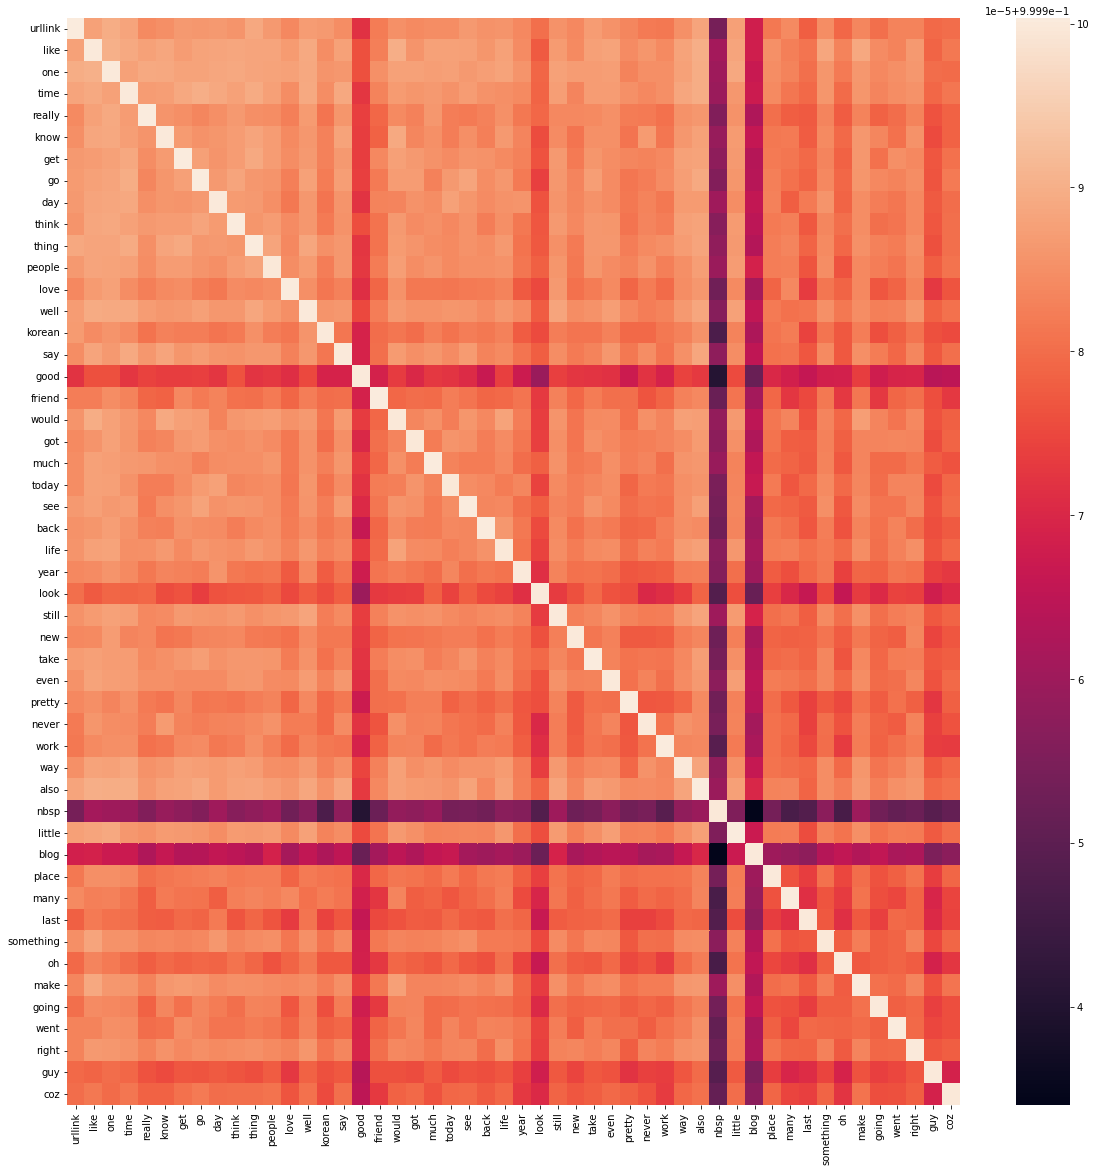

In [337]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(ax=ax, 
            data=similarities,
            xticklabels=top50_tfidf_word_vectors_df.index, 
            yticklabels=top50_tfidf_word_vectors_df.index)

In [338]:
# T-SNE plot to show the similarities between words

tsne_model = TSNE(n_components=2, random_state=32)
new_values = tsne_model.fit_transform(top50_tfidf_word_vectors_df) 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [339]:
type(blog_data_1_text_selected)

pandas.core.frame.DataFrame

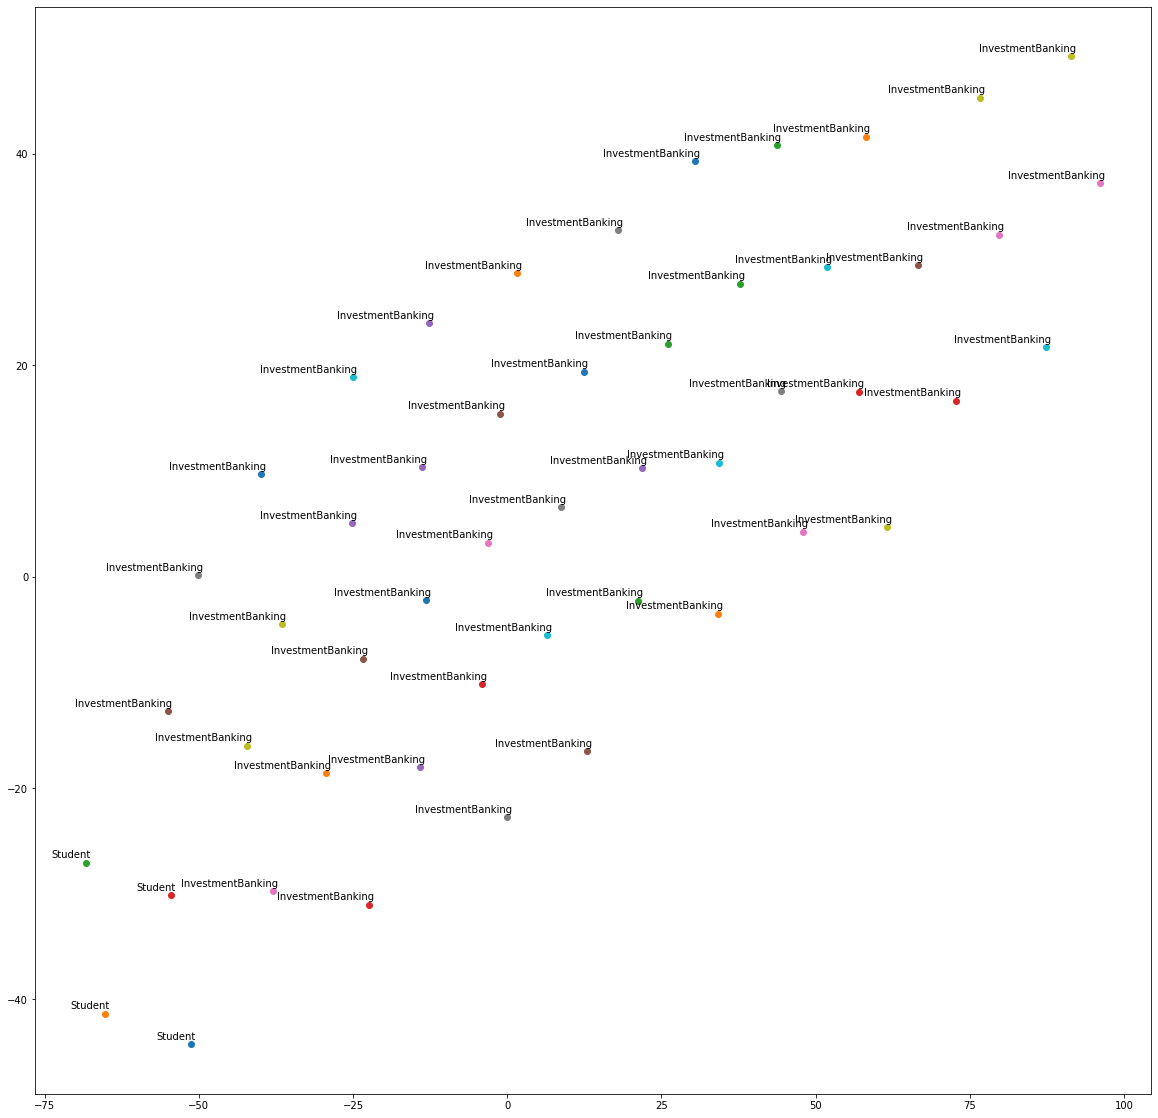

In [341]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(20, 20))
labels = list(blog_data_1_text_selected.topic)

for i in range(len(x)):
    new_value = new_values[i]
    x = new_value[0]
    y = new_value[1]
        
    plt.scatter(x, y)
    plt.annotate(labels[i],
                    xy=(x, y),
                    xytext=(5, 3),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    #plt.savefig(f'figures/{experiment_name}_tsne.png')
plt.show()
plt.close()

In [342]:
# Training Classifier with Word2Vec

## Taking average of all word embeddings in a sentence to generate the sentence representation.
data_list_wv = list()
for comp in blog_data_1_text_selected['text']:
    sentence = np.zeros(300)
    count = 0
    for w in normalize_text(comp):
        try:
            sentence += model_word2vec.wv[w]
            count += 1
        except KeyError:
            continue
    data_list_wv.append(sentence / count)

In [343]:
## Train_Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(data_list_wv), blog_data_1_text_selected.topic.values, test_size=0.15, random_state=42)
print(X_train.shape, y_train.shape)

(419, 300) (419,)


In [344]:
### Training and Testing the classifier
## Bernoulli model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
model_w2v_bnb = BernoulliNB()
model_w2v_bnb.fit(X_train, y_train)
pred = model_w2v_bnb.predict(X_test)
print('NB_Score:', accuracy_score(y_test, pred))

## RandomForest model
from sklearn.ensemble import RandomForestClassifier
model_w2v_rf = RandomForestClassifier()
model_w2v_rf.fit(X_train, y_train)
pred = model_w2v_rf.predict(X_test)
print('RF_Score:', accuracy_score(y_test, pred))

NB_Score: 0.5466666666666666
RF_Score: 0.5066666666666667


word2Vec gives 54% accuracy. 

word2Vec performs worse than one-hot encoding

**Glove Embedding**

In [345]:
# Importing the glove model and creating the embeddings

import os
glove_path = '/content/drive/My Drive/Colab Notebooks/glove.6B.300d.txt'
embeddings_index = {}
f = open(glove_path, encoding='utf8')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    #print(embeddings_index)
f.close()

In [346]:
# Verifying similar words from the pretrained embeddings

from scipy import spatial
def find_similar_word(emmbedes):
  nearest = sorted(embeddings_index.keys(), key=lambda word: spatial.distance.euclidean(embeddings_index[word], emmbedes))
  return nearest

In [347]:
find_similar_word(embeddings_index['student'])[0:10]

['student',
 'students',
 'teacher',
 'graduate',
 'campus',
 'undergraduate',
 'faculty',
 'school',
 'academic',
 'enrolled']

In [348]:
# Convering the embedding words to vectors

words = list(embeddings_index.keys())
vectors = [embeddings_index[word] for word in words]

In [349]:
# Converting the vectors to dataframe

embed_df =  (pd.DataFrame(vectors, index= words).transpose())
embed_df.head()

,the,",",.,of,to,and,in,a,"""",'s,...,sigarms,katuna,aqm,1.3775,corythosaurus,chanty,kronik,rolonda,zsombor,sandberger
0,0.046560,-0.255390,-0.125590,-0.076947,-0.257560,0.038466,-0.44399,-0.297120,0.694700,-0.001272,...,0.14649,-0.030013,0.46348,0.71376,0.886490,0.392700,0.136790,0.075713,0.81451,0.429191
1,0.213180,-0.257230,0.013630,-0.021211,-0.057132,-0.039792,0.12817,0.094049,0.221840,0.365140,...,-0.47266,0.246260,-0.42811,-0.56625,-0.095745,-0.022505,-0.139090,-0.040502,-0.36221,-0.296897
2,-0.007436,0.131690,0.103060,0.212710,-0.671900,0.082747,-0.25247,-0.096662,0.105260,-0.077363,...,0.17144,0.068192,0.45750,-0.18468,0.189610,0.304580,-0.360890,0.183450,0.31186,0.150110
3,-0.458540,-0.042688,-0.101230,-0.722320,-0.380820,-0.389230,-0.18582,-0.344000,0.012382,-0.265590,...,0.26431,0.089033,0.25317,0.30104,0.012919,0.187990,0.079864,0.512300,0.81381,0.245201
4,-0.035639,0.218170,0.098128,-0.139880,-0.364210,-0.214310,-0.16614,-0.184830,-0.255800,0.179870,...,-0.13895,-0.199770,0.58327,-0.56443,-0.409250,0.141180,0.321490,-0.228560,0.18852,-0.003520


In [356]:
top50_tokens_embed = (embed_df.mean().sort_values(ascending=False).head(50).index)
print(top50_tokens_embed.shape)
top50_tokens_embed

(50,)


Index(['u.n.-mandated', 'soliah', 'jokanovic', 'bm', 'kiro', 'zivkovic',
       'trajkovski', 'wesson', '9-by-13-inch', 'hrdy', '115-year', 'kand',
       'cowries', 'umayyad', '600-word', 'pq', 'bjt', 'nni', 'asma',
       'crvenkovski', 'seedings', 'momir', '1stld', 'cbn', 'slugline', 'igman',
       'hca', 'atif', 'roybal', 'multiethnic', 'ergenekon', 'secularist',
       'anatolian', 'dg', 'roomba', 'phonograph', 'gyns', 'highlanders', 'unb',
       'transferases', 'mushtarak', '110-billion', 'bessette', 'amiram',
       '243,000', 'u.s.-trained', '13-inch', 'soundblaster', 'fabriclive',
       'rajputs'],
      dtype='object')

In [357]:
# Extracting the top50 words

top50_embed_vectors = {token: embed_df[token] 
                               for token in top50_tokens_embed}

top50_embed_vectors_df = (pd.DataFrame(top50_embed_vectors).transpose())
top50_embed_vectors_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
u.n.-mandated,-0.081681,-0.170390,0.534500,-0.164300,-0.222700,-0.157360,-0.566050,0.086727,0.538370,0.292110,...,-0.079202,0.669450,0.502080,0.513010,0.813210,-0.457030,0.615930,0.288270,-0.310560,0.340610
soliah,0.523120,0.077401,-0.302340,0.148060,0.894500,-0.834800,0.114370,0.135970,0.333780,0.331180,...,0.030271,0.497960,0.598700,0.494500,0.394110,-0.810980,-0.031956,0.598330,0.191070,-0.115460
jokanovic,0.377650,0.080231,-0.181280,0.920010,0.781970,0.123620,0.163900,0.236340,0.808230,0.515530,...,0.228220,0.432290,0.147500,0.238640,0.387380,-0.277640,-0.253610,0.074710,0.319530,0.126170
bm,0.219400,-0.388040,-0.153380,0.260630,-0.384360,0.587010,0.111830,0.807690,-0.726490,0.207780,...,0.242290,0.293350,0.313980,-0.012007,0.404710,-0.139320,0.286610,-0.569980,0.083385,0.573010
kiro,-0.015586,0.344980,-0.327670,0.417030,-0.066823,0.054410,-0.313520,-0.180640,0.215820,0.241560,...,0.904710,-0.697890,0.868190,-0.571180,-0.192030,0.235080,0.077907,0.789880,0.367130,0.589760
zivkovic,0.425970,-0.111160,0.449380,0.515180,-0.207470,0.272620,-0.274090,-0.494490,-0.090400,0.476470,...,0.573970,-0.024384,1.216500,0.423420,0.216200,-0.247930,0.043080,0.216130,0.092858,-0.176990
trajkovski,0.758620,0.558340,0.577750,0.052258,0.465200,0.504820,0.840670,-0.254800,-0.027243,0.752820,...,1.071300,-0.816940,1.088600,-0.806620,-0.077455,-0.478480,0.249850,-0.004519,-0.201140,0.901440
wesson,0.158510,0.742080,-0.292560,0.517880,-0.054424,0.647230,-0.163060,0.379760,0.329750,0.710880,...,0.255950,-0.634780,1.369400,0.007032,0.197220,0.252720,0.303740,0.116350,0.106060,0.623490
9-by-13-inch,0.558190,0.103270,-0.430670,-0.186890,0.143840,0.644550,-0.357590,-0.945730,-0.537870,0.363860,...,-0.302740,0.526970,-0.012137,-0.664870,1.311200,-0.163660,0.182480,0.322390,0.132560,0.648930
hrdy,0.524840,0.327310,-0.713760,0.345920,0.016647,-0.275490,-1.001100,-0.076057,0.920410,0.818800,...,0.629120,0.106390,1.930100,-0.154570,1.382500,-0.575670,-1.069400,1.937600,0.508940,0.464620


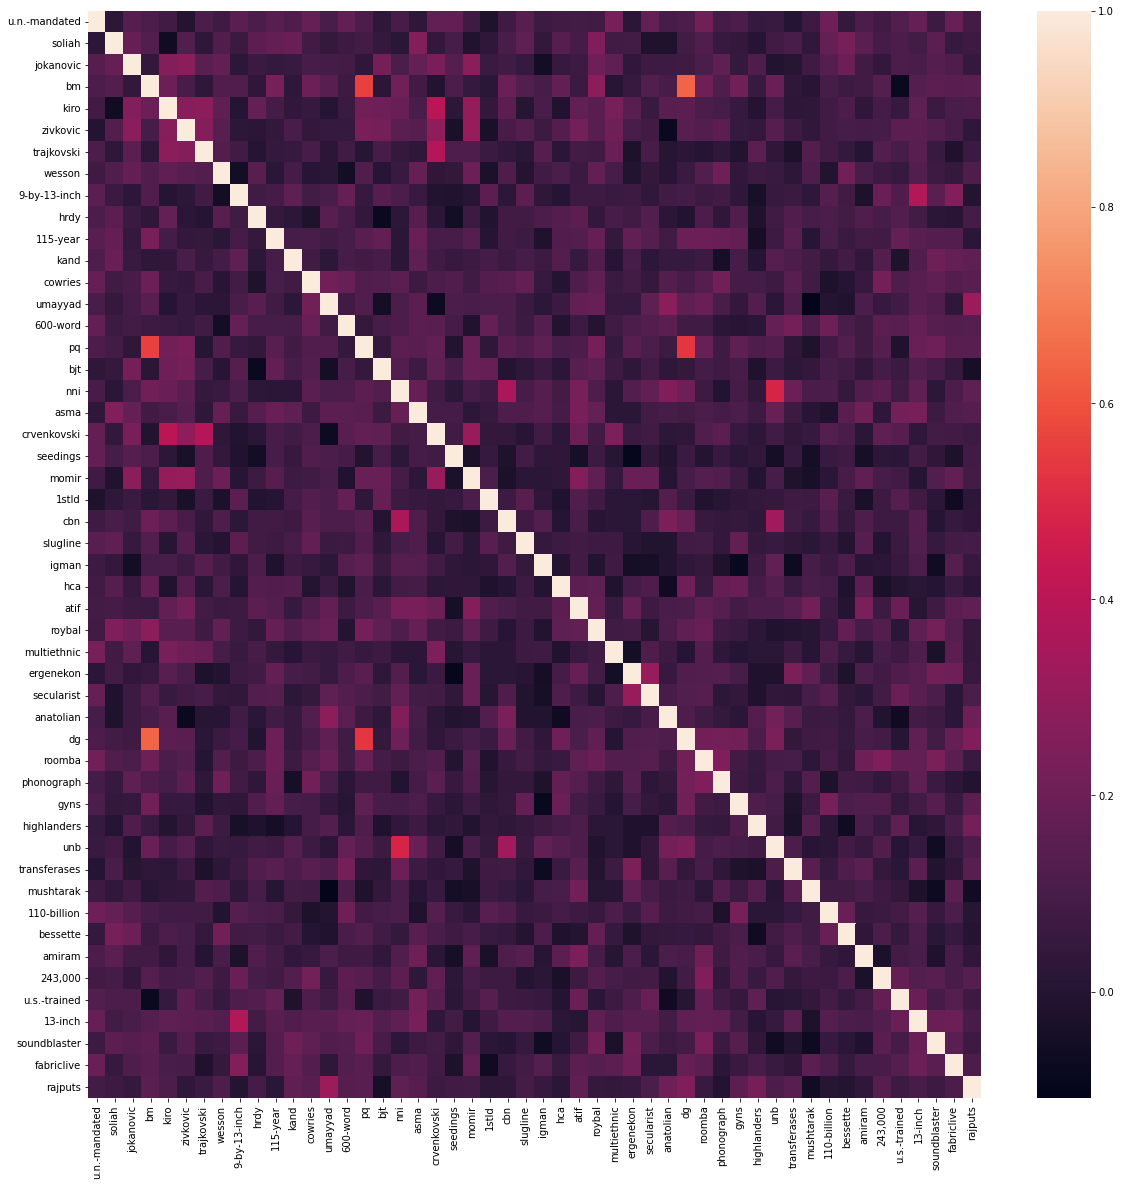

In [358]:
# Cosine Similarity
# Computing the similarities for for embedding size 300
similarities = cosine_similarity(top50_embed_vectors_df, 
                                 top50_embed_vectors_df)

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(ax=ax, 
            data=similarities,
            xticklabels=top50_embed_vectors_df.index, 
            yticklabels=top50_embed_vectors_df.index)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


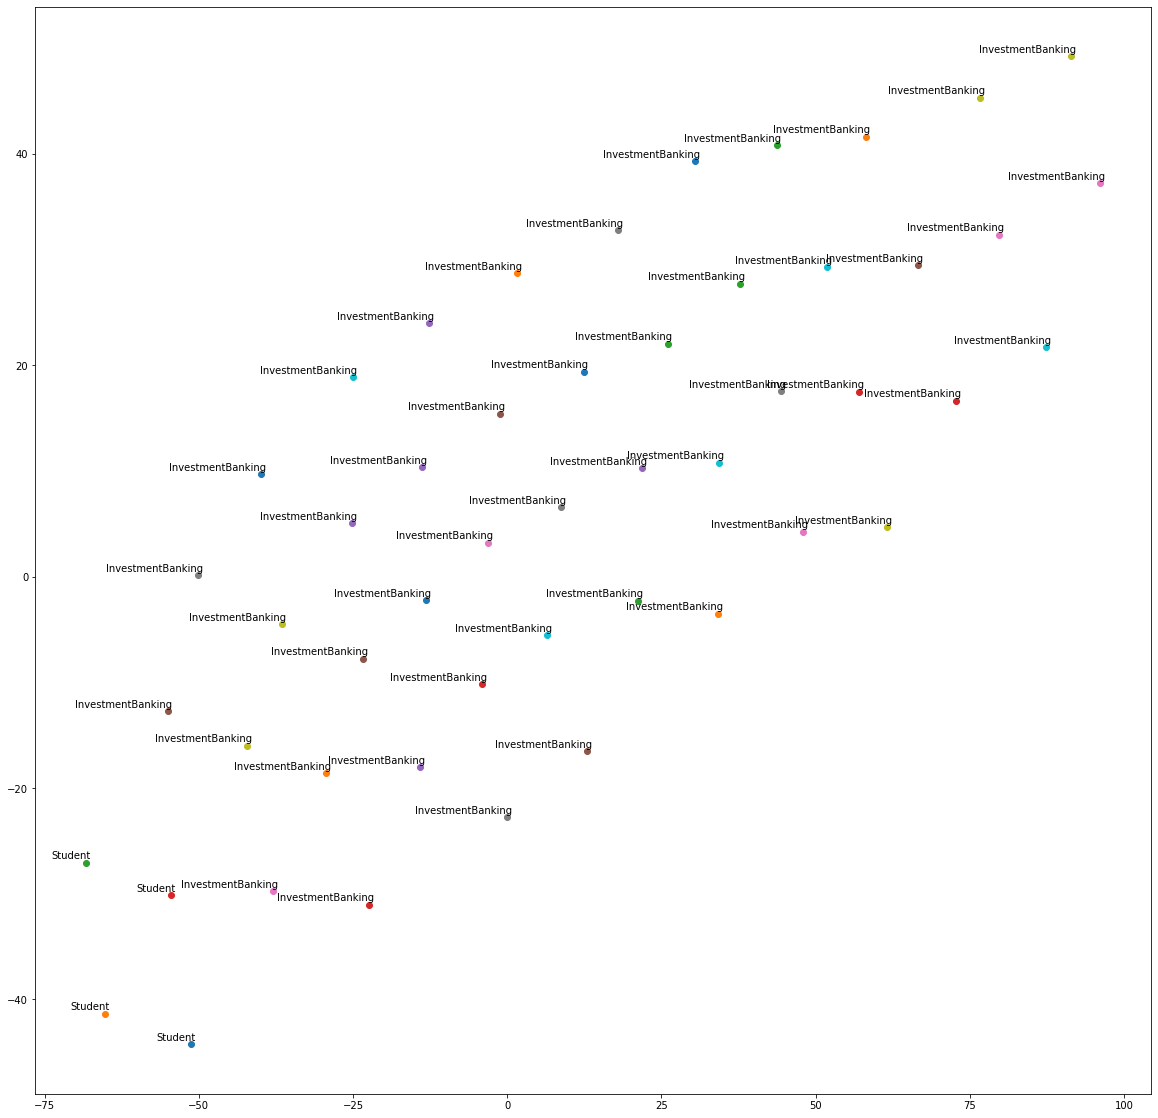

In [360]:
# TSNE Plot

tsne_model = TSNE(n_components=2, random_state=32)
new_value = tsne_model.fit_transform(top50_embed_vectors_df)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(20, 20))
labels = list(blog_data_1_text_selected.topic)

for i in range(len(x)):
    new_value = new_values[i]
    x = new_value[0]
    y = new_value[1]
        
    plt.scatter(x, y)
    plt.annotate(labels[i],
                    xy=(x, y),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    #plt.savefig(f'figures/{experiment_name}_tsne.png')
plt.show()
plt.close()

In [361]:
blog_data_1_text_selected

,text,labels,topic,normalized_text
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]",Student,info found page mb pdf file wait untill team l...
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]",Student,team member drewes van der laag urllink mail r...
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]",Student,het kader van kernfusie op aarde maak je eigen...
3,testing testing,"[male, 15, Student, Leo]",Student,testing testing
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]",InvestmentBanking,thanks yahoo toolbar capture url popups mean s...
...,...,...,...,...
495,quote graduate college graduating year finish ...,"[female, 27, Education, Aquarius]",Education,quote graduate college graduating year finish ...
496,yesterday bunny day driving sister laws parent...,"[female, 27, Education, Aquarius]",Education,yesterday bunny day driving sister law parent ...
497,past week spring break school spent tidying lo...,"[female, 27, Education, Aquarius]",Education,past week spring break school spent tidying lo...
498,devil mean uncle sam sell soul get second job ...,"[female, 27, Education, Aquarius]",Education,devil mean uncle sam sell soul get second job ...


In [362]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
blog_data_1_text_selected['Target'] = le.fit_transform(blog_data_1_text_selected['topic'])
blog_data_1_text_selected.head()

<ipython-input-362-f35b5f9f956e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blog_data_1_text_selected['Target'] = le.fit_transform(blog_data_1_text_selected['topic'])


,text,labels,topic,normalized_text,Target
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]",Student,info found page mb pdf file wait untill team l...,4
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]",Student,team member drewes van der laag urllink mail r...,4
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]",Student,het kader van kernfusie op aarde maak je eigen...,4
3,testing testing,"[male, 15, Student, Leo]",Student,testing testing,4
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]",InvestmentBanking,thanks yahoo toolbar capture url popups mean s...,2


In [363]:
# Train the classifier with Glove Embeddings

# Taking average of all word embeddings in a sentence to generate the sentence representation.
data_list = list()
for comp in blog_data_1_text_selected['text']:
    sentence = np.zeros(300)
    count = 0
    for w in normalize_text(comp):
        try:
            sentence += embeddings_index[w]
            count += 1
        except KeyError:
            continue
    data_list.append(sentence / count)

len(data_list[0])

300

In [364]:
## Train_Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(data_list), blog_data_1_text_selected.topic.values, test_size=0.15, random_state=42)
print(X_train.shape, y_train.shape)

### Training and Testing the classifier

## Bernoulli model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
model_gloveembed_bnb = BernoulliNB()
model_gloveembed_bnb.fit(X_train, y_train)
pred = model_gloveembed_bnb.predict(X_test)
print('NB_Score:', accuracy_score(y_test, pred))

## RandomForest model
from sklearn.ensemble import RandomForestClassifier
model_gloveembed_rf=RandomForestClassifier()
model_gloveembed_rf.fit(X_train, y_train)
pred = model_gloveembed_rf.predict(X_test)
print('RF_Score:', accuracy_score(y_test, pred))


(419, 300) (419,)
NB_Score: 0.52
RF_Score: 0.5733333333333334


Glove also gives only 52% less than the one-hot-bit

# **Part B**

In [365]:
# Importing libraries

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random

import nltk
nltk.download('punkt')

nltk.download('wordnet')

nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [366]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [367]:

words=[]
classes = []
documents = []
ignore_words = ['?', '!']

In [368]:
# Load .json file
data_file = open('/content/drive/My Drive/Colab Notebooks/GL+Bot.json').read()
intents = json.loads(data_file)

In [369]:
# Pre-process data

# Tokenizing 
for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [370]:
w

['create', 'a', 'ticket']

In [371]:
words = []

In [372]:
# lemmatize, lower each word and remove duplicates
for name in w:
    words.append(name.lower())

for w in words:
  if w not in ignore_words:
    words = sorted(list(set(words)))


# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents
print(len(documents), "documents")

# classes = intents
print(len(classes), "classes", classes)

# words = all words, vocabulary
print(len(words), "unique lemmatized words", words)
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

128 documents
8 classes ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']
3 unique lemmatized words ['a', 'create', 'ticket']


In [373]:
# Create training and testing data

# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


<ipython-input-373-d00649451e07>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [416]:

from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
vocab_size = 128
embedding_dim = 8
max_len = 3

model = Sequential()
#model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [424]:

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)
print("model created")

Epoch 1/200
26/26 [==============================] - 1s 2ms/step - loss: 2.0654 - accuracy: 0.2031
Epoch 2/200
26/26 [==============================] - 0s 3ms/step - loss: 2.0226 - accuracy: 0.2266
Epoch 3/200
26/26 [==============================] - 0s 2ms/step - loss: 1.9973 - accuracy: 0.2266
Epoch 4/200
26/26 [==============================] - 0s 2ms/step - loss: 1.9927 - accuracy: 0.2266
Epoch 5/200
26/26 [==============================] - 0s 2ms/step - loss: 1.9852 - accuracy: 0.2266
Epoch 6/200
26/26 [==============================] - 0s 3ms/step - loss: 1.9826 - accuracy: 0.2266
Epoch 7/200
26/26 [==============================] - 0s 3ms/step - loss: 1.9824 - accuracy: 0.2266
Epoch 8/200
26/26 [==============================] - 0s 3ms/step - loss: 1.9806 - accuracy: 0.2266
Epoch 9/200
26/26 [==============================] - 0s 2ms/step - loss: 1.9804 - accuracy: 0.2266
Epoch 10/200
26/26 [==============================] - 0s 3ms/step - loss: 1.9845 - accuracy: 0.2266
Epoch 11/

In [425]:
# Predict the response

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
intents = json.loads(open('/content/drive/My Drive/Colab Notebooks/GL+Bot.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [426]:
intents

{'intents': [{'tag': 'Intro',
   'patterns': ['hi',
    'how are you',
    'is anyone there',
    'hello',
    'whats up',
    'hey',
    'yo',
    'listen',
    'please help me',
    'i am learner from',
    'i belong to',
    'aiml batch',
    'aifl batch',
    'i am from',
    'my pm is',
    'blended',
    'online',
    'i am from',
    'hey ya',
    'talking to you for first time'],
   'responses': ['Hello! how can i help you ?'],
   'context_set': ''},
  {'tag': 'Exit',
   'patterns': ['thank you',
    'thanks',
    'cya',
    'see you',
    'later',
    'see you later',
    'goodbye',
    'i am leaving',
    'have a Good day',
    'you helped me',
    'thanks a lot',
    'thanks a ton',
    'you are the best',
    'great help',
    'too good',
    'you are a good learning buddy'],
   'responses': ['I hope I was able to assist you, Good Bye'],
   'context_set': ''},
  {'tag': 'Olympus',
   'patterns': ['olympus',
    'explain me how olympus works',
    'I am not able to understan

In [430]:
def clean_up_sentence(sentence):
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words
# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))
def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.10
    print(res)
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    #print(results)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    #print(return_list)
    return return_list

In [431]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    print(tag)
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result
def chatbot_response(text):
    ints = predict_class(text, model)
    #print(ints)
    res = getResponse(ints, intents)
    return res

**1. Start chat session with greetings and ask what the user is looking for**

**2. Accep Dynamic Based questions from the user and reply back with relevant answers**

**3. End the chat session only if the user requests to end else ask what the user is looking for**

In [432]:
flag=True
print(" BOT : My name is Jarvis. Let's have a conversation")
while(flag==True):
  user_response = input()
  if(user_response == 'bye'):
    flag=False
    print(" BOT : Bye . Take care")
    
  else:
   if(user_response == 'thanks' or user_response == 'thank you'):
     flag=False
     print(" BOT : You are welcome")
   else:
     if(chatbot_response(user_response)!= None):
       print(" BOT : "+chatbot_response(user_response))
     else:
      #sent_tokens.append(user_response)
       word_tokens = word_tokens+nltk.word_tokenize(user_response)
       final_words=list(set(word_tokens))

 BOT : My name is Jarvis. Let's have a conversation
hi
1/1 [==============================] - 0s 18ms/step
[0.06628357 0.10556378 0.16747838 0.204314   0.09654123 0.06488999
 0.23507321 0.05985596]
SL
1/1 [==============================] - 0s 18ms/step
[0.06628357 0.10556378 0.16747838 0.204314   0.09654123 0.06488999
 0.23507321 0.05985596]
SL
 BOT : Link: Machine Learning wiki 
a
1/1 [==============================] - 0s 18ms/step
[0.00282253 0.48902908 0.00248232 0.00241202 0.15367244 0.16013744
 0.00297346 0.18647075]
Exit
1/1 [==============================] - 0s 17ms/step
[0.00282253 0.48902908 0.00248232 0.00241202 0.15367244 0.16013744
 0.00297346 0.18647075]
Exit
 BOT : I hope I was able to assist you, Good Bye
cricket
1/1 [==============================] - 0s 19ms/step
[0.06628357 0.10556378 0.16747838 0.204314   0.09654123 0.06488999
 0.23507321 0.05985596]
SL
1/1 [==============================] - 0s 19ms/step
[0.06628357 0.10556378 0.16747838 0.204314   0.09654123 0.064889

We have maximum data for SL class. Therefore, even if user writes 'hi' the softmax function gives highest value of probability for "SL" class only and it's corresponding response has been displayed by BOT...i.e. Machine Learning wiki

Also, the accuracy of model is only 26% as we have less data for training . Due to this the softmax output is not as per the requirement